IMPORTING LIBRARIES AND DATA LOADING

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# Load the dataset
df = pd.read_csv("nyc-rolling-sales.csv")
# Display the first few rows and column names
display(df.head()), display(df.columns.tolist())

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


['Unnamed: 0',
 'BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

(None, None)

DATA CLEANING

In [ ]:
# Step 1: Drop irrelevant or redundant columns
df_clean = df.drop(columns=[
    'Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER',
    'BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT',
    'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE'
])

# Step 2: Convert SALE PRICE to numeric and remove invalid entries
df_clean['SALE PRICE'] = pd.to_numeric(df_clean['SALE PRICE'], errors='coerce')
df_clean = df_clean[df_clean['SALE PRICE'] > 0]

# Step 3: Convert LAND SQUARE FEET and GROSS SQUARE FEET to numeric
df_clean['LAND SQUARE FEET'] = pd.to_numeric(df_clean['LAND SQUARE FEET'], errors='coerce')
df_clean['GROSS SQUARE FEET'] = pd.to_numeric(df_clean['GROSS SQUARE FEET'], errors='coerce')

# Step 4: Convert SALE DATE to datetime
df_clean['SALE DATE'] = pd.to_datetime(df_clean['SALE DATE'], errors='coerce')

# Step 5: Drop rows with missing essential fields
df_clean = df_clean.dropna(subset=['GROSS SQUARE FEET', 'SALE DATE'])

# Step 6: Map borough numbers to names
borough_map = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}
df_clean['BOROUGH'] = df_clean['BOROUGH'].map(borough_map)

# Step 7: Create PRICE PER SQFT
df_clean['PRICE PER SQFT'] = df_clean['SALE PRICE'] / df_clean['GROSS SQUARE FEET']

df_clean.shape, df_clean.head()

/tmp/ipython-input-4-79422541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LAND SQUARE FEET'] = pd.to_numeric(df_clean['LAND SQUARE FEET'], errors='coerce')
/tmp/ipython-input-4-79422541.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['GROSS SQUARE FEET'] = pd.to_numeric(df_clean['GROSS SQUARE FEET'], errors='coerce')
/tmp/ipython-input-4-79422541.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

((38020, 16),
      BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
 0  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
 3  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
 4  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
 6  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
 9  Manhattan  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              
 
    BLOCK  LOT                 ADDRESS  ZIP CODE  RESIDENTIAL UNITS  \
 0    392    6            153 AVENUE B     10009                  5   
 3    402   21     154 EAST 7TH STREET     10009                 10   
 4    404   55  301 EAST 10TH   STREET     10009                  6   
 6    406   32            210 AVENUE B     10009                  8   
 9    387  153     629 EAST 5TH STREET     10009                 24   
 
    COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
 0                 0

DATA ANALYSIS AND VISUALIZATIONS

**CHART NO : 1 DISTRIBUTION OF SALES PRICES IN NYC**

**What it shows**: How many properties are sold at different price ranges.

**Insight**: Helps people understand if most properties are low-priced, high-priced, or somewhere in the middle.






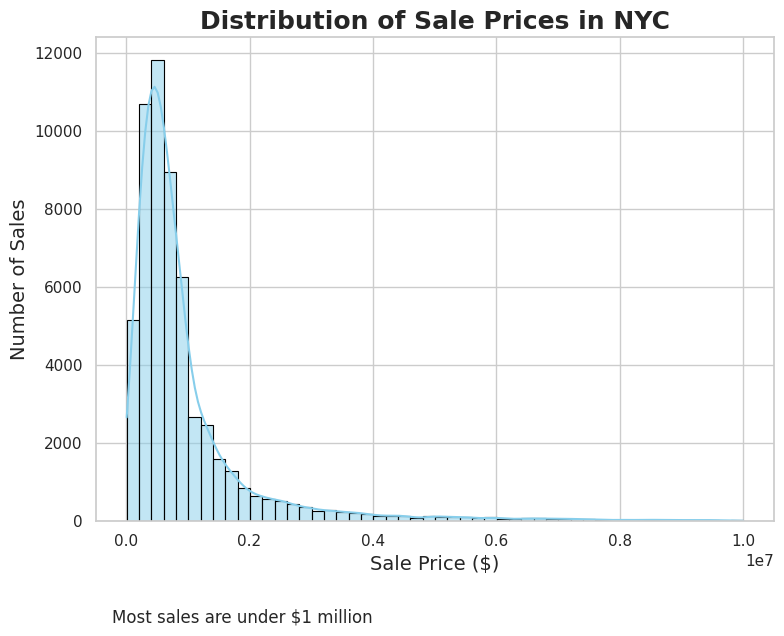

In [ ]:
# Convert SALE PRICE to numeric (force strings to NaN)
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Remove rows with NaN sale price
df = df[df['SALE PRICE'].notnull()]

# Remove very low prices (likely errors)
df = df[df['SALE PRICE'] > 10000]

# Remove extreme outliers
capped_df = df[df['SALE PRICE'] < 1e7]
sns.set_theme(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 18, 'axes.titleweight': 'bold', 'axes.labelsize': 14})

# Create histogram with density plot
plt.figure(figsize=(8, 6))

# Cap sale prices at a reasonable upper limit to avoid skew from extreme outliers (e.g., $10 million)
capped_df = df[df['SALE PRICE'] < 1e7]

sns.histplot(capped_df['SALE PRICE'], bins=50, color='skyblue', kde=True, edgecolor='black')

plt.title('Distribution of Sale Prices in NYC')
plt.xlabel('Sale Price ($)')
plt.ylabel('Number of Sales')

# Short, clear caption
plt.figtext(0.15, -0.05, 'Most sales are under $1 million', fontsize=12, ha='left')

plt.tight_layout()
plt.show()


**CHART NO 2: PROPERTY TYPE BREAKDOWN**

**What it shows**: Proportion of different property types (e.g., one-family homes, condos).

**Insight**: Helps people see what kinds of properties are most commonly sold.

/tmp/ipython-input-6-2208265986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_counts.values, y=property_counts.index, palette=colors)


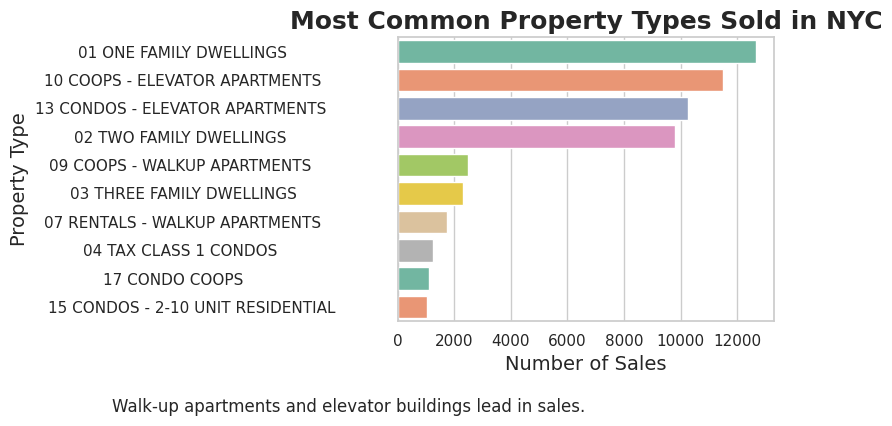

In [ ]:

# Convert SALE PRICE to numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df = df[df['SALE PRICE'].notnull()]
df = df[df['SALE PRICE'] > 10000]  # Remove invalid low prices

# Use 'BUILDING CLASS CATEGORY' as property type
property_counts = df['BUILDING CLASS CATEGORY'].value_counts().head(10)  # Top 10 types

# Colors: bright and intuitive
colors = sns.color_palette("Set2", len(property_counts))

# Create a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=property_counts.values, y=property_counts.index, palette=colors)

plt.title("Most Common Property Types Sold in NYC", fontsize=18, weight='bold')
plt.xlabel("Number of Sales")
plt.ylabel("Property Type")

# Short caption
plt.figtext(0.15, -0.05, "Walk-up apartments and elevator buildings lead in sales.", fontsize=12, ha='left')

plt.tight_layout()
plt.show()



**CHART NO 3:SALE PRICE vs GROSS SQUARE FEET**

**What it shows**: Relationship between size and price.

**Insight**: Shows whether larger properties always cost more (and by how much).

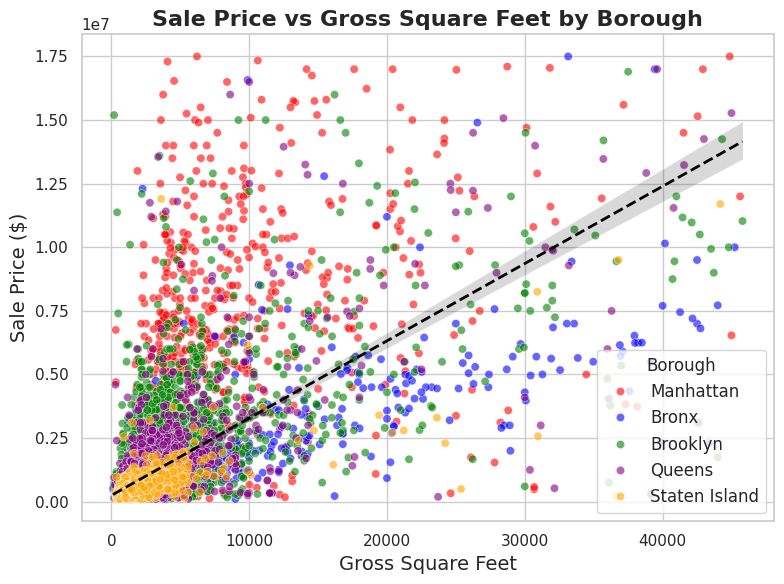

In [ ]:
# Clean and convert data
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['BOROUGH'] = pd.to_numeric(df['BOROUGH'], errors='coerce')
df.dropna(subset=['SALE PRICE', 'GROSS SQUARE FEET', 'BOROUGH'], inplace=True)

# Filter out rows with low values
filtered_df = df[(df['SALE PRICE'] > 100000) & (df['GROSS SQUARE FEET'] > 100)]

# Remove outliers
upper_price = filtered_df['SALE PRICE'].quantile(0.99)
upper_sqft = filtered_df['GROSS SQUARE FEET'].quantile(0.99)
filtered_df = filtered_df[
    (filtered_df['SALE PRICE'] <= upper_price) &
    (filtered_df['GROSS SQUARE FEET'] <= upper_sqft)
]

# Color palette
borough_palette = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange'
}

# Plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=filtered_df,
    x='GROSS SQUARE FEET',
    y='SALE PRICE',
    hue='BOROUGH',
    palette=borough_palette,
    alpha=0.6
)

sns.regplot(
    data=filtered_df,
    x='GROSS SQUARE FEET',
    y='SALE PRICE',
    scatter=False,
    color='black',
    line_kws={"linewidth": 2, "linestyle": "dashed"}
)

plt.title('Sale Price vs Gross Square Feet by Borough', fontsize=16, weight='bold')
plt.xlabel('Gross Square Feet', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)

borough_labels = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
handles, labels = scatter.get_legend_handles_labels()
new_labels = [borough_labels.get(int(float(label)), label) for label in labels if str(label).replace('.', '', 1).isdigit()]
plt.legend(handles=handles, labels=new_labels, title='Borough', fontsize=12)

plt.tight_layout()
plt.show()



**CHART NO 4 : SALES PRICE DISTRIBUTION BY BUILDING AGE**

**What it shows**: How prices vary with building age.

**Insight**: Tells if newer or older buildings are more valuable.

/tmp/ipython-input-9-3124857067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


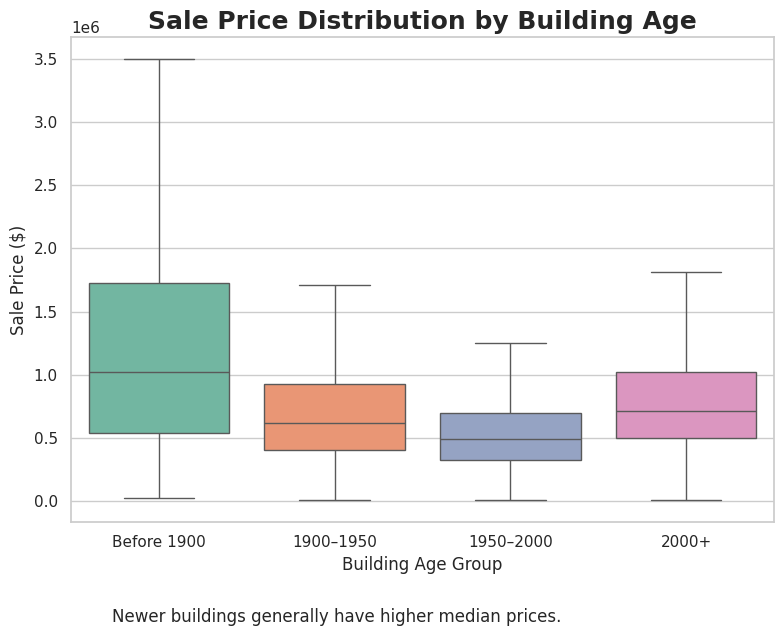

In [ ]:

# Convert columns
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['YEAR BUILT'] = pd.to_numeric(df['YEAR BUILT'], errors='coerce')

# Clean data
df = df[df['SALE PRICE'].notnull()]
df = df[df['YEAR BUILT'].notnull()]
df = df[df['SALE PRICE'] > 10000]
df = df[df['YEAR BUILT'] > 1800]

# Cap prices
df = df[df['SALE PRICE'] < 5_000_000]  # Cap at $5 million

# Create building age groups
bins = [1800, 1900, 1950, 2000, 2025]
labels = ['Before 1900', '1900–1950', '1950–2000', '2000+']
df['Building Age Group'] = pd.cut(df['YEAR BUILT'], bins=bins, labels=labels)

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# Box plot with clearer display
sns.boxplot(
    data=df,
    x='Building Age Group',
    y='SALE PRICE',
    palette='Set2',
    showfliers=False  # Hide individual outlier points for cleaner look
)

plt.title("Sale Price Distribution by Building Age", fontsize=18, weight='bold')
plt.xlabel("Building Age Group")
plt.ylabel("Sale Price ($)")

# Caption
plt.figtext(0.15, -0.05, "Newer buildings generally have higher median prices.", fontsize=12, ha='left')

plt.tight_layout()
plt.show()

**CHART NO 5: AVERAGE SALES PRICE BY BOROUGH IN NYC**

What it show:how prices differ from places to places in NYC

Insights:Manhattan Has the Highest Property Prices,Brooklyn and Queens Have Mid-Range Prices,Bronx and Staten Island Are Most Affordable


/tmp/ipython-input-10-2433637643.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sale_by_borough.index, y=avg_sale_by_borough.values, palette="viridis")


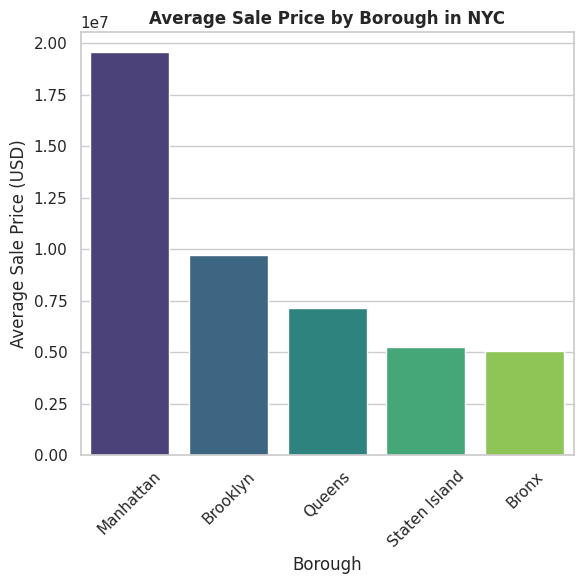

In [ ]:

# Convert SALE PRICE, LAND SQUARE FEET, and GROSS SQUARE FEET to numeric (remove non-numeric chars and coerce errors)
df["SALE PRICE"] = pd.to_numeric(df["SALE PRICE"].astype(str).str.replace(r"[^\d]", "", regex=True), errors='coerce')
df["LAND SQUARE FEET"] = pd.to_numeric(df["LAND SQUARE FEET"].astype(str).str.replace(r"[^\d]", "", regex=True), errors='coerce')
df["GROSS SQUARE FEET"] = pd.to_numeric(df["GROSS SQUARE FEET"].astype(str).str.replace(r"[^\d]", "", regex=True), errors='coerce')

# Filter out rows with zero or null SALE PRICE
df_clean = df[df["SALE PRICE"] > 100]

# Create a chart: Average Sale Price by Borough
borough_map = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}
df_clean["BOROUGH_NAME"] = df_clean["BOROUGH"].map(borough_map)

avg_sale_by_borough = df_clean.groupby("BOROUGH_NAME")["SALE PRICE"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x=avg_sale_by_borough.index, y=avg_sale_by_borough.values, palette="viridis")
plt.title("Average Sale Price by Borough in NYC")
plt.ylabel("Average Sale Price (USD)")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**CHART NO 6:CORRELATION**

**What it shows**: Relationships between numeric features (e.g., price, lot area, building area).

**Insight**: Useful to understand if certain features affect price.

In [ ]:
# Data cleaning and preparation
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['YEAR BUILT'] = pd.to_numeric(df['YEAR BUILT'], errors='coerce')
df['AGE'] = 2025 - df['YEAR BUILT']

# Encode categorical variables
df['BOROUGH_CODE'] = df['BOROUGH']
df['PROPERTY_TYPE_CODE'] = df['BUILDING CLASS CATEGORY'].astype('category').cat.codes

# Select columns
selected_cols = ['BOROUGH_CODE', 'AGE', 'PROPERTY_TYPE_CODE', 'GROSS SQUARE FEET']
filtered_df = df[selected_cols].dropna()

# Compute correlation matrix
corr_matrix = filtered_df.corr().round(2)

# Create the interactive heatmap
heatmap = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Correlation"),
        hoverongaps=False,
        hovertemplate=
            "<b>%{y}</b> vs <b>%{x}</b><br>Correlation: %{z}<extra></extra>"
    )
)

#Customize layout
heatmap.update_layout(
    title=dict(
        text="Interactive Correlation Heatmap:<br>Borough, Building Age, Property Type, Gross Sq. Ft",
        x=0.5,
        xanchor="center",
        font=dict(size=18)
    ),
    xaxis=dict(tickangle=-45),
    width=700,
    height=600,
    template="plotly_white"
)

# Show the plot
heatmap.show()
